<a href="https://colab.research.google.com/github/JonSax88/PracticalMachineLearning/blob/main/Sax_Module_4_Assignment_2_Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [ ]:
import pandas as pd
from pandas import Categorical 
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline
sns.set()

In [ ]:
data = pd.read_csv("data.csv")
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# EDA

In [ ]:
missing = data.isnull().sum()
missing.sum()

0

In [ ]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [ ]:
features = [f for f in data.columns if data.dtypes[f] != 'object']
features.remove('Bankrupt?')
features

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

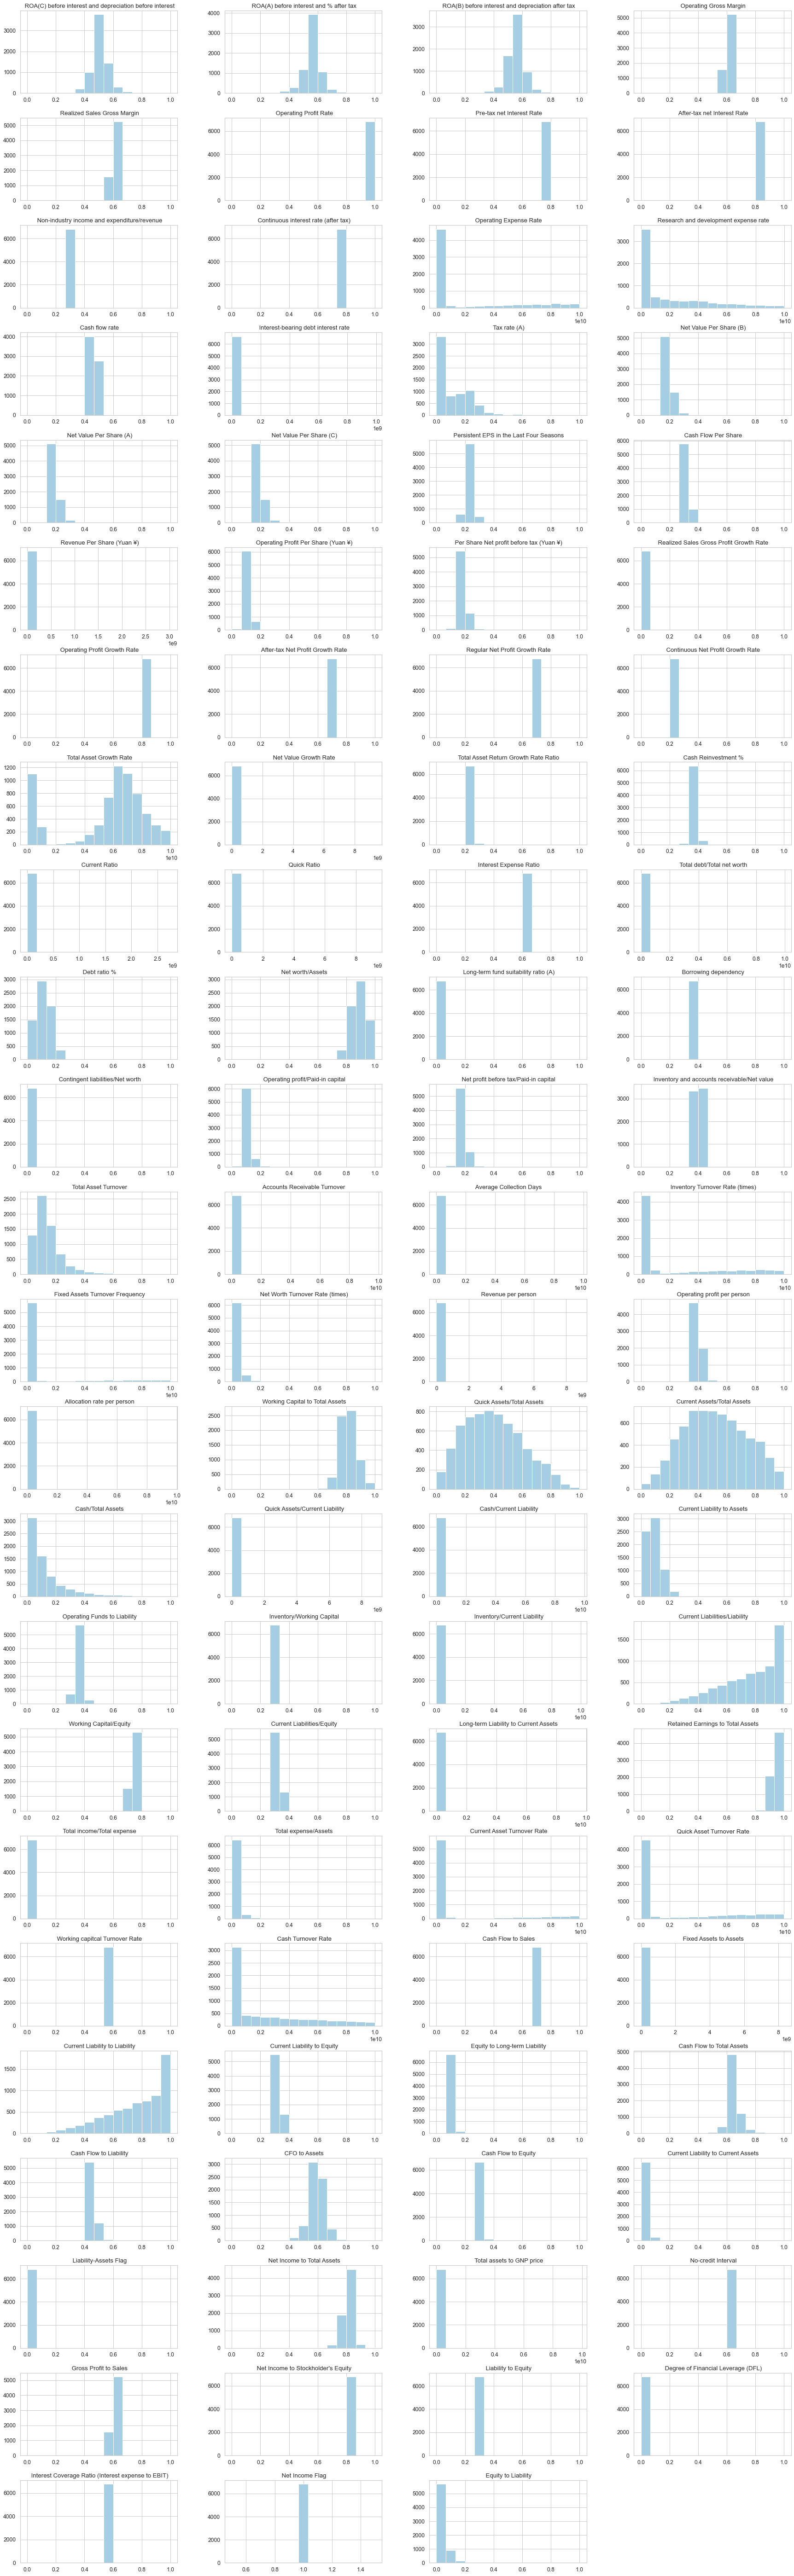

In [ ]:
sns.set(style='whitegrid', palette="Paired", font_scale=1.1, rc={"figure.figsize": [30, 102]})
data[features].hist(bins=15, layout=(24, 4));

# Modeling

In [ ]:
X = data.drop('Bankrupt?', axis=1) # defines features (X's) as ALL the columns except 'Bankrupt?' column
y = data['Bankrupt?'] # defines response variable (y) as the 'Bankrupt?' column

In [ ]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [ ]:
# Split the training set into an 80% training and 20% validation set

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.8, test_size=0.2)

In [ ]:
data['Bankrupt?'].value_counts()


0    6599
1     220
Name: Bankrupt?, dtype: int64

### Logistic Regression

In [ ]:
LogRegModel = LogisticRegression(max_iter = 7000)

In [ ]:
LogRegModel.fit(X_train, y_train)

LogisticRegression(max_iter=7000)

Testing the LogRegModel with training data:

In [ ]:
y_train_pred = LogRegModel.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

Testing the LogRegModel with testing data:


In [ ]:
y_test_pred = LogRegModel.predict(X_test)
y_test_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Printing an array on y_train

unique, counts = np.unique(y_train_pred, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5385],
       [   1,   70]])

In [ ]:
# Printing an array on y_test

unique, counts = np.unique(y_test_pred, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 1346],
       [   1,   18]])

#### Performance Measures :: Logistic Regression

In [ ]:
cross_val_score(LogRegModel, X_train, y_train, cv=3, scoring="accuracy")

array([0.9675646 , 0.97139714, 0.96479648])

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogRegModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


#### Cross-Validation :: Logistic Regression

In [ ]:
# convert data to numpy arrays
y_train_bankrupt = (y_train == 1).to_numpy() 


In [ ]:
y_train_bankrupt

array([False, False, False, ..., False, False, False])

In [ ]:
X_train_bankrupt = X_train
X_train_bankrupt

array([[-0.10986099, -0.24044907, -0.14558148, ...,  0.09837115,
         0.        , -0.50123487],
       [ 0.02349878,  0.05614987,  0.08563338, ...,  0.00283269,
         0.        , -0.41808484],
       [ 0.05965052,  0.03621045,  0.01783353, ...,  0.00955856,
         0.        , -0.12041831],
       ...,
       [ 0.03474599,  0.05448825,  0.05521037, ...,  0.03346924,
         0.        , -0.36232239],
       [ 1.25506819,  1.30734875,  1.30081525, ..., -0.01198774,
         0.        ,  0.21404522],
       [ 1.20927598,  1.0539519 ,  0.92096226, ..., -0.01467129,
         0.        ,  0.06097221]])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
skfolds

for train_index, test_index in skfolds.split(X_train_bankrupt, y_train_bankrupt):
    clone_LogRegModel = clone(LogRegModel)
    X_train_folds = X_train_bankrupt[train_index]
    y_train_folds = y_train_bankrupt[train_index]
    X_test_fold = X_train_bankrupt[test_index]
    y_test_fold = y_train_bankrupt[test_index]

    clone_LogRegModel.fit(X_train_folds, y_train_folds)
    y_pred_fold = clone_LogRegModel.predict(X_test_fold)
    n_correct = sum(y_pred_fold == y_test_fold)
    print(n_correct / len(y_pred_fold))



0.9626168224299065
0.9680968096809681
0.9686468646864687


#### Confusion Matrix :: Logistic Regression

In [ ]:
y_predict = LogRegModel.predict(X_test)
confusion_matrix_model = confusion_matrix(y_test, y_predict)
print(confusion_matrix_model)

[[1306    7]
 [  40   11]]


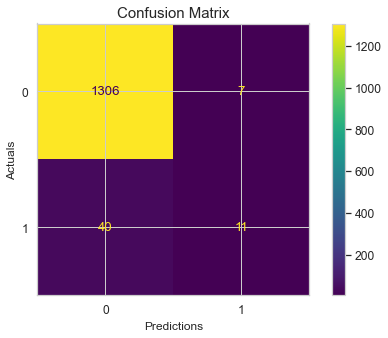

In [ ]:
# using MatPlotLib

plot_confusion_matrix(LogRegModel, X_test, y_test)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

<AxesSubplot:>

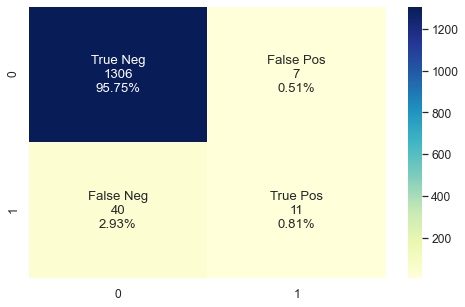

In [ ]:
# using Seaborn

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_model.flatten()/np.sum(confusion_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(style='whitegrid', palette="Purples", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.heatmap(pd.DataFrame(confusion_matrix_model), annot=labels, fmt='', cmap='YlGnBu')



#### Precision and Recall :: Logistic Regression

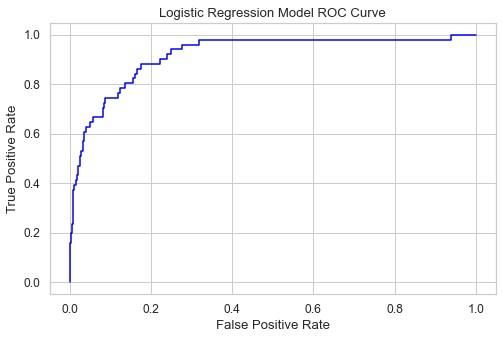

In [ ]:
#define metrics
y_pred_proba = LogRegModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color="blue")
plt.title('Logistic Regression Model ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

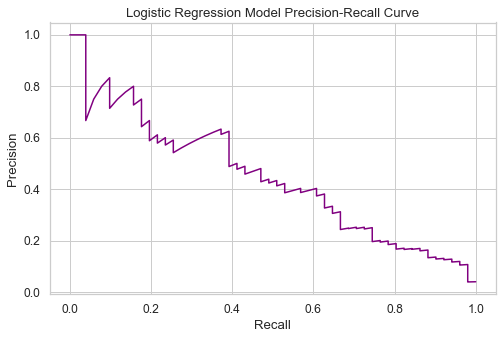

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Logistic Regression Model Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
# F1-score

target_names = ['Did not go bankrupt', 'Bankrupt']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Did not go bankrupt       0.96      1.00      0.98      1313
           Bankrupt       1.00      0.04      0.08        51

           accuracy                           0.96      1364
          macro avg       0.98      0.52      0.53      1364
       weighted avg       0.97      0.96      0.95      1364



## Support Vector Machine (Linear)

In [ ]:
# Create and fit the model
svc = SVC(C=1,kernel='linear',gamma = 0.001, probability=True)
svc.fit(X_train,y_train)

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

In [ ]:
# Predict the response for test dataset
y_pred = svc.predict(X_test)

#### Performance Measures :: SVM

In [ ]:
accuracy_score(y_test,svc.predict(X_test))

0.9640762463343109

In [ ]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.96


#### Cross-Validation :: SVM

In [ ]:
cross_val_score(svc, X_train, y_train, cv=3, scoring="accuracy")

array([0.96921385, 0.96919692, 0.96754675])

In [ ]:
for train_index, test_index in skfolds.split(X_train_bankrupt, y_train_bankrupt):
    clone_svc = clone(svc)
    X_train_folds = X_train_bankrupt[train_index]
    y_train_folds = y_train_bankrupt[train_index]
    X_test_fold = X_train_bankrupt[test_index]
    y_test_fold = y_train_bankrupt[test_index]

    clone_svc.fit(X_train_folds, y_train_folds)
    y_pred_fold = clone_svc.predict(X_test_fold)
    n_correct = sum(y_pred_fold == y_test_fold)
    print(n_correct / len(y_pred_fold))

0.965915338097856
0.966996699669967
0.9686468646864687


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labeled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 0.0392156862745098


#### Confusion Matrix :: SVM

In [ ]:
y_predict = svc.predict(X_test)
confusion_matrix_model = confusion_matrix(y_test, y_predict)
print(confusion_matrix_model)

[[1313    0]
 [  49    2]]


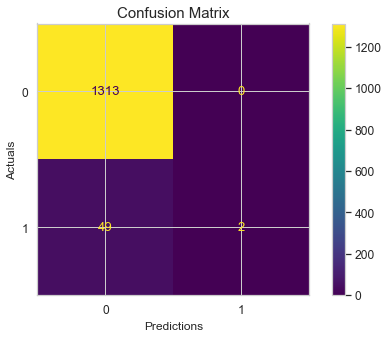

In [ ]:
# using MatPlotLib

plot_confusion_matrix(svc, X_test, y_test)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

#### Precision and Recall :: SVM

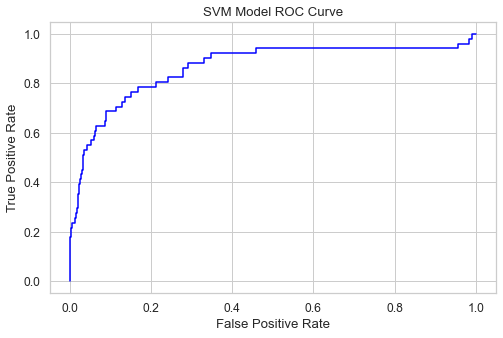

In [ ]:
#define metrics
y_pred_proba = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color="blue")
plt.title('SVM Model ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

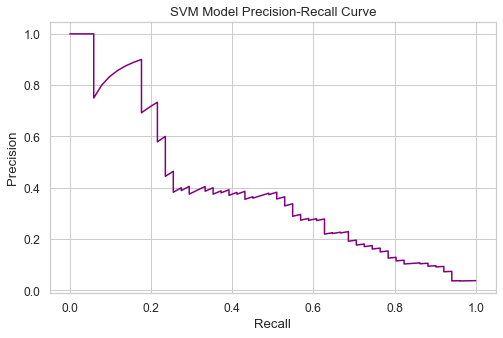

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('SVM Model Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### Conduct hyperparameter tuning for the SVM kernel

In [ ]:
# inspiration for this code: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/


from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.3s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.6s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   2.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions, target_names=target_names))

                     precision    recall  f1-score   support

Did not go bankrupt       0.97      1.00      0.98      1313
           Bankrupt       0.86      0.12      0.21        51

           accuracy                           0.97      1364
          macro avg       0.91      0.56      0.59      1364
       weighted avg       0.96      0.97      0.95      1364



# Naïve Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Create a Gaussian Classifier
NBmodel = GaussianNB()

In [ ]:
# Train the model using the training sets
NBmodel.fit(X_train,y_train)

GaussianNB()

In [ ]:
predicted = NBmodel.predict(X_test) 

In [ ]:
cross_val_score(NBmodel, X_train, y_train, cv=3, scoring="accuracy")

array([0.2100055 , 0.1809681 , 0.15456546])

In [ ]:
print('Accuracy of Naïve Bayes classifier on test set: {:.2f}'.format(NBmodel.score(X_test, y_test)))

Accuracy of Naïve Bayes classifier on test set: 0.17


In [ ]:
cross_val_score(NBmodel, X_train, y_train, cv=3, scoring="accuracy")

array([0.2100055 , 0.1809681 , 0.15456546])